In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import os
import glob
from tqdm import tqdm

In [ ]:
# Load image
img_list = glob.glob("/home/VirtualFlaw/Data/Raw_jpg/ACC_Merged/*")
for img in tqdm(img_list):
    print(img)
    print("k-means clustering.")
    image = cv2.imread(img)
    origin_image = image.copy()
    data = image.reshape((-1, 3)).astype(np.float32)

    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER, 10, .0)

    k = 5
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    image = res.reshape((image.shape))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    print("Sobel filtering.")
    #sobel
    sobelx = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.uint8(sobelx)

    #CV_8UC1 change
    sobel = cv2.cvtColor(sobel, cv2.COLOR_BGR2GRAY)
    print("Hough transform.")
    # 허프 변환 적용 
    try:
        lines = cv2.HoughLines(sobel, 1, np.pi/180, 615)
        x1, y1, x2, y2 = [], [], [], []
        for i in lines:
            rho, theta = i[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1.append(int(x0 + 1500 * (-b)))
            y1.append(int(y0 + 1500 * (a)))
            x2.append(int(x0 - 1500 * (-b)))
            y2.append(int(y0 - 1500 * (a)))
            

        x1_max, x2_max = int(max(x1)), int(max(x2))
        y1_max, y2_max = int(max(y1)), int(max(y2))
        x1_min, x2_min = int(min(x1)), int(min(x2))
        y1_min, y2_min = int(min(y1)), int(min(y2)) 
        
        y1 = int((y1_max + y2_max) / 2)
        y2 = int((y1_min + y2_min) / 2)
        cv2.line(image, (0, y1), (1256, y1), (0, 255, 0), 2)
        cv2.line(image, (0, y2), (1256, y2), (0, 255, 0), 2)
        
        #merged = cv2.addWeighted(origin_image, 0.5, image, 0.5, 0)
        cv2.imwrite("/home/VirtualFlaw/Hyun/Data/EdgeDetection3/{}".format(img.split("/")[-1]), image)
        if abs(y1 - y2) < 400 and abs(y1 - y2) > 150:
            cv2.imwrite("/home/VirtualFlaw/Hyun/Data/EdgeDetection3_Best/{}".format(img.split("/")[-1]), image)
    except Exception as e:
        print(e, img)
        continue
#save 

k-means clustering.
Sobel filtering.
Hough transform.


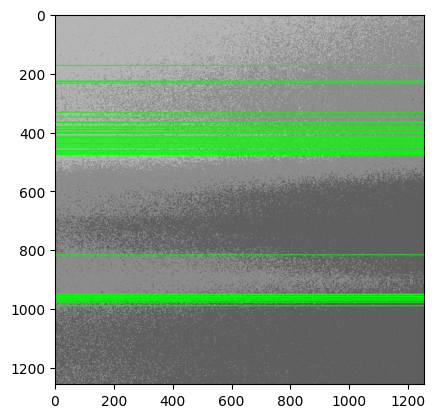

In [32]:
img = "/home/VirtualFlaw/Data/Raw_jpg/ACC_Add/22C042-06-063-1st-1-(1).jpg"
print("k-means clustering.")
image = cv2.imread(img)
origin_image = image.copy()
data = image.reshape((-1, 3)).astype(np.float32)

criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER, 10, .0)

k = 3
ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
image = res.reshape((image.shape))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


print("Sobel filtering.")
#sobel
sobelx = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=7)
sobel = np.uint8(sobelx)

#CV_8UC1 change
sobel = cv2.cvtColor(sobel, cv2.COLOR_BGR2GRAY)
print("Hough transform.")
# 허프 변환 적용 


lines = cv2.HoughLines(sobel, 1, np.pi/180, 1100, None, min_theta=np.pi/2, max_theta=np.pi/2)
x1, y1, x2, y2 = [], [], [], []
for i in lines:
    rho, theta = i[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    
    x1.append(int(x0 + 1500 * (-b)))
    y1.append(int(y0 + 1500 * (a)))
    x2.append(int(x0 - 1500 * (-b)))
    y2.append(int(y0 - 1500 * (a)))
    cv2.line(image, (x1[-1], y1[-1]), (x2[-1], y2[-1]), (0, 255, 0), 2)
    
plt.imshow(image)
    